In [2]:
from dask import delayed

def fraction_to_percent(x):
     percentage = x * 100
     print('Converting to percentage')
     return x

frac = 0.3
percentage = delayed(fraction_to_percent)(frac) # execute only when .compute() is called
computed_percentage = percentage.compute() 

print(percentage)
print(computed_percentage)

Converting to percentage
Delayed('fraction_to_percent-1bc6b8b1-3a6d-45e3-8f32-8bcaf43eb383')
0.3


In [3]:
costs_week_1 = [121, 729, 441, 961, 841, 729, 25, 225, 256, 441, 400, 484, 900]
costs_week_2 = [196,
 361,
 81,
 441,
 49,
 100,
 729,
 841,
 676,
 256,
 121,
 576,
 49,
 100,
 49,
 16,
 961,
 36,
 841]

In [4]:
# Import the delayed function from Dask
from dask import delayed
import numpy as np
# Lazily calculate the sums of costs_week_1 and costs_week_2
sum1 = delayed(np.sum)(costs_week_1)
sum2 = delayed(np.sum)(costs_week_2)

# Add the two delayed sums
total = delayed(lambda x, y: x + y)(sum1, sum2)

# Compute and print the final answer
print(total.compute())

13032


In [5]:
# Import the delayed function from Dask
from dask import delayed

# Lazily calculate the sums of costs_week_1 and costs_week_2
sum1 = delayed(np.sum)(costs_week_1)
sum2 = delayed(np.sum)(costs_week_2)

# Add the two delayed sums
total = (sum1+ sum2)

# Compute and print the final answer
print(total.compute())

13032


![image.png](./attachment/image1.jpg)

[]: # Path: 01-Lazy Evaluation and Parallel Computing.ipynb

In [ ]:
# Add the two delayed month costs
total_costs = month_1_costs + month_2_costs

# Calculate the fraction of total cost from month 1
month_1_fraction = month_1_costs / total_costs

# Calculate the fraction of total cost from month 2
month_2_fraction = month_2_costs / total_costs

# Plot the joint task graph used to calculate the fractions
dask.visualize(month_1_fraction, month_2_fraction)

In [15]:
import pandas as pd  
import os
filenames = os.listdir('./spotify')
filenames = ['./spotify/' + file for file in filenames]
maximums = []  
n_songs_in_c, n_songs = 0, 0 
for file in filenames:     # Load each file     
    df = pd.read_csv(file)  
    # Find maximum track length in each file     
    max_length = (df['key'] == 'C').sum()  
    # Store this maximum     
    maximums.append(max_length) 
        
    # Add to running totals
    n_songs_in_c += (df['key'] == 'C').sum()
    n_songs += df.shape[0]
 
 # Find the maximum of all the maximum lengths 
absolute_maximum = max(maximums) 
absolute_maximum,n_songs_in_c,n_songs,total_n_songs_in_c / total_n_songs


(1589, 19125, 161738)

In [10]:
import dask
import pandas as pd
import os
filenames = os.listdir('./spotify')
filenames = ['./spotify/' + file for file in filenames]
n_songs_in_c, n_songs = 0, 0 

for file in filenames:
    # Load in the data
    df = delayed(pd.read_csv)(file)
    
    # Add to running totals
    n_songs_in_c += (df['key'] == 'C').sum()
    n_songs += df.shape[0]

# Efficiently compute total_n_songs_in_c and total_n_songs
total_n_songs_in_c, total_n_songs = dask.compute(n_songs_in_c,n_songs)

fraction_c = total_n_songs_in_c / total_n_songs
print(total_n_songs, fraction_c)

161738 0.11824679419802396


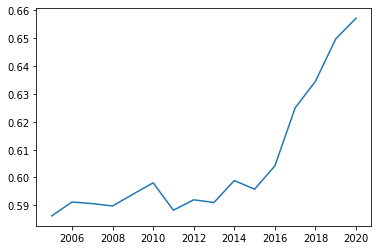

In [17]:
danceabilities = []
import pandas as pd
import os
import matplotlib.pyplot as plt
filenames = os.listdir('./spotify')
years = [int(file.split('_')[0]) for file in filenames]
filenames = ['./spotify/' + file for file in filenames]
for file in filenames:
	# Lazily load in the data
    df = delayed(pd.read_csv)(file)
    # Calculate the average danceability in the file of songs
    mean_danceability = df['danceability'].mean()
    danceabilities.append(mean_danceability)

# Compute all the mean danceabilities
danceability_list = dask.compute(danceabilities)[0]
# Plot the results
plt.plot(years, danceability_list)
plt.show()

In [21]:

top_songs = []
def top_10_most_popular(df):
  return df.nlargest(n=10, columns='popularity')
top_songs = []

for file in filenames:
    df = delayed(pd.read_csv)(file)
    # Find the top 10 most popular songs in this file
    df_top_10 = delayed(top_10_most_popular)(df)
    top_songs.append(df_top_10)

# Compute the list of top 10s
top_songs_list = dask.compute(*top_songs)

# Concatenate them and find the best of the best
top_songs_df = pd.concat(top_songs_list)
df_all_time_top_10 = top_10_most_popular(top_songs_df)
(df_all_time_top_10)

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,key,acousticness,instrumentalness,tempo
2257,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],2020-03-20,0.680,C,0.02120,0.000012,118.051
11698,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],2020-12-04,0.653,B,0.11200,0.000000,83.970
2280,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],2020-03-20,0.514,C#,0.00146,0.000095,171.005
7835,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],2020-09-16,0.798,G#,0.41400,0.019200,120.031
9090,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],2019-11-07,0.749,B,0.20800,0.037100,90.028
2489,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],2020-03-27,0.449,C,0.52400,0.000001,89.087
10238,27OeeYzk6klgBh83TSvGMA,WITHOUT YOU,94,161385,1,['The Kid LAROI'],2020-11-06,0.662,C,0.21300,0.000000,93.005
11850,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']",2020-12-10,0.713,G#,0.12200,0.000000,168.021
11238,2XIc1pqjXV3Cr2BQUGNBck,LA NOCHE DE ANOCHE,93,203201,0,"['Bad Bunny', 'ROSALÍA']",2020-11-27,0.856,G,0.03030,0.000000,81.993
13368,3YJJjQPAbDT7mGpX3WtQ9A,Good Days,93,279204,1,['SZA'],2020-12-25,0.436,C#,0.49900,0.000008,121.002
